In [13]:
from IPython.display import Image 

# Step 1: Browse the Ocean Marketplace Using the Graphical User Interface

Check out the available datasets by Algovera [here](https://market.oceanprotocol.com/search?sort=created&sortOrder=desc&text=0x2338e4e94AEe1817701F65f2c751f7c844b0e43b). For this tutorial, we will work with the MS COCO keypoints dataset. This is freely available [online](https://cocodataset.org/#home) but we will download it from the Ocean marketplace to learn about the process. You will then be able to use this process to work with datasets that are not publicly available. You can see the COCO dataset on the Ocean marketplace [here](https://market.oceanprotocol.com/asset/did:op:8c0DcCdfb9CA94c0Ac24b133690532f3D37f8A3E). Make sure that you are browsing datasets on the Rinkeby network (see image below).

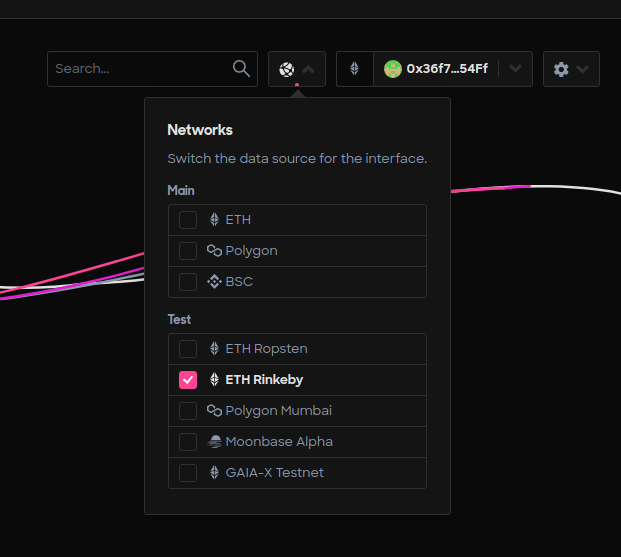

In [14]:
display(Image(filename='images/marketplace-network.png', width = 400))

Download the sample data for COCO through the Marketplace GUI and inspect it (always make sure to only download samples from data providers that you trust!). 

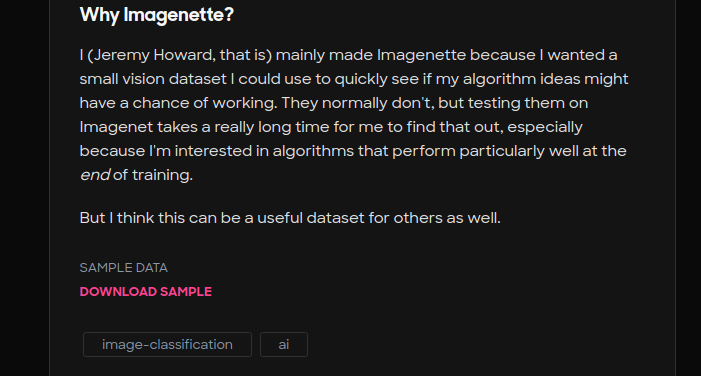

In [15]:
display(Image(filename='images/download-sample.png', width = 400))

# Step 2: Browse the Ocean Marketplace Using the Ocean Python Library

In [16]:
from ocean_lib.ocean.ocean import Ocean
from ocean_lib.config import Config

config = Config('config.ini')
ocean = Ocean(config)

print(f"config.network_url = '{config.network_url}'")
print(f"config.metadata_cache_uri = '{config.metadata_cache_uri}'")
print(f"config.provider_url = '{config.provider_url}'")

config.network_url = 'https://rinkeby.infura.io/v3/d163c48816434b0bbb3ac3925d6c6c80'
config.metadata_cache_uri = 'https://aquarius.oceanprotocol.com'
config.provider_url = 'https://provider.rinkeby.oceanprotocol.com'


Next, export your private key from your metamask wallet. We highly recommend doing this with a wallet that has no real tokens in it (only Rinkeby tokens). For more info on private keys, see [this](https://github.com/oceanprotocol/ocean.py/blob/main/READMEs/wallets.md) from the ocean.py documentation: 

*The whole point of crypto wallets is to store private keys. Wallets have various tradeoffs of cost, convienence, and security. For example, hardware wallets tend to be more secure but less convenient and not free. It can also be useful to store private keys locally on your machine, for testing, though only with a small amount of value at stake (keep the risk down octopus). Do not store your private keys on anything public, unless you want your tokens to disappear. For example, don't store your private keys in GitHub or expose them on frontend webpage code.*

With this in mind, you can directly load your private key into the notebook. We use an envvar rather than storing it in code that might be pushed to a repo. WE copy THIS in for a new session (you may need to restart the notebook server). Here's how we export an environmental variable using an example key (replace this with your actual private key.). From your console:

```console
export MY_TEST_KEY=0xaefd8bc8725c4b3d15fbe058d0f58f4d852e8caea2bf68e0f73acb1aeec19baa
```

Now initialize your wallet:

In [ ]:
import os
from ocean_lib.web3_internal.wallet import Wallet

wallet = Wallet(ocean.web3, private_key=os.getenv('MY_TEST_KEY'))

print(f"public address = '{wallet.address}'")

Now let's download a dataset. For the COCO dataset [here](https://market.oceanprotocol.com/asset/did:op:8c0DcCdfb9CA94c0Ac24b133690532f3D37f8A3E), copy the decentralized identifier (DID).  

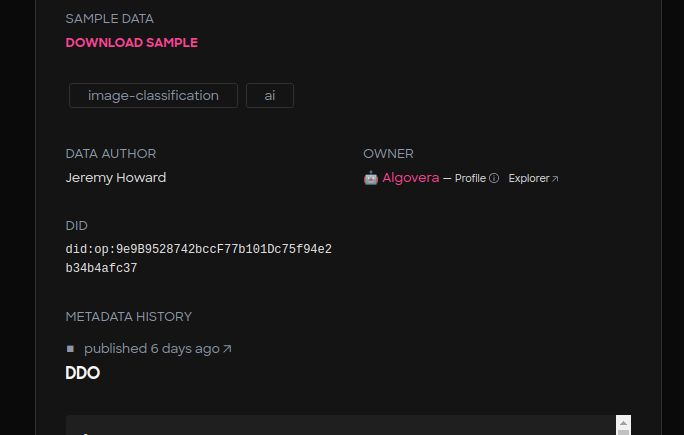

In [17]:
display(Image(filename='images/did.png', width = 400))

In [19]:
did = "did:op:8c0DcCdfb9CA94c0Ac24b133690532f3D37f8A3E"
asset = ocean.assets.resolve(did)

print(f"Data token info = '{asset.values['dataTokenInfo']}'")
print(f"Dataset name = '{asset.metadata['main']['name']}'")

Data token info = '{'address': '0x8c0DcCdfb9CA94c0Ac24b133690532f3D37f8A3E', 'name': 'Ambitious Clownfish Token', 'symbol': 'AMBCLO-22', 'decimals': 18, 'cap': 1000.0}'
Dataset name = 'COCO 2017 Keypoints'


In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

We can get the URL to the sample data from the associated metadata:

In [20]:
sample_link = asset.metadata['additionalInformation']['links'][0]['url']
print(f"Sample link = '{sample_link}'")

Sample link = 'https://drive.google.com/file/d/18fAJc57MjcX7qsoZML7S7zYAiHETXWlc/view?usp=sharing'


Download the data from the command line (TO DO: fix+streamline this. For now, the sample is downloaded manually in the JupyterHub instance):

!curl -L {sample_link} > coco2017-sample.zip

Unzip the downloaded file with:

In [ ]:
!unzip coco2017-sample.zip

In [2]:
dataDir='coco2017-sample'
dataType='val2017'
annFile='{}/annotations/instances_{}-sample.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
electronic appliance kitchen vehicle accessory furniture outdoor sports food indoor person animal


In [6]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [785])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

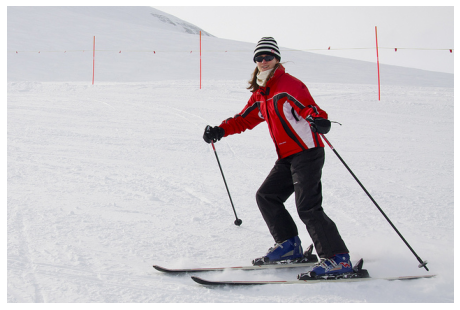

In [7]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

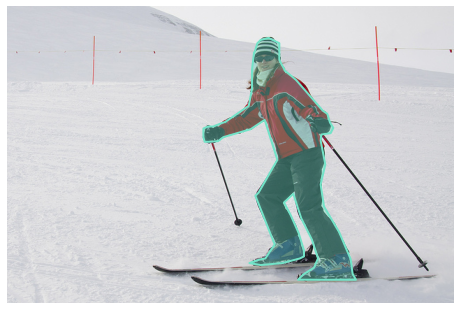

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [9]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}-sample.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


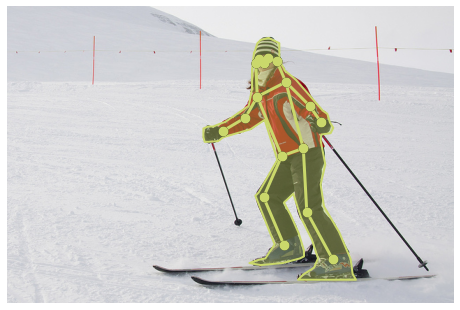

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}-sample.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


A woman posing for the camera standing on skis.
a woman standing on skiis while posing for the camera
A woman in a red jacket skiing down a slope
A young woman is skiing down the mountain slope. 
a person on skis makes her way through the snow


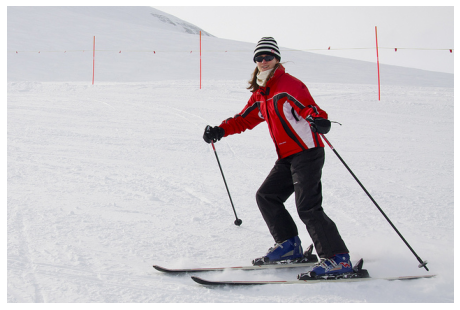

In [12]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()